All libraries imported successfully
LOADING RAW DATA MODEL FOLD SCORES
   Loaded: base_knn (10 folds)
   Loaded: base_decision_tree (10 folds)
   Loaded: base_random_forest (10 folds)
   Loaded: base_svr (10 folds)
   Loaded: base_ridge (10 folds)
   Loaded: base_neural_network (10 folds)
   Loaded: ensemble_bagging_neural_network (10 folds)
   Loaded: ensemble_bagging_random_forest (10 folds)
   Loaded: ensemble_boosting_gradient_boost (10 folds)
   Loaded: ensemble_stacking_neural_ridge_neural_final (10 folds)
   Loaded: ensemble_stacking_neural_ridge_ridge_final (10 folds)
   Loaded: ensemble_stacking_neural_only (10 folds)

Total raw models loaded: 12
   base_knn: mean RMSE = 2.2231 +/- 1.2058
   base_decision_tree: mean RMSE = 2.6249 +/- 1.0994
   base_random_forest: mean RMSE = 2.4823 +/- 1.2138
   base_svr: mean RMSE = 2.1208 +/- 1.2802
   base_ridge: mean RMSE = 2.2212 +/- 1.2310
   base_neural_network: mean RMSE = 11.8002 +/- 2.2888
   ensemble_bagging_neural_network: mean RMS

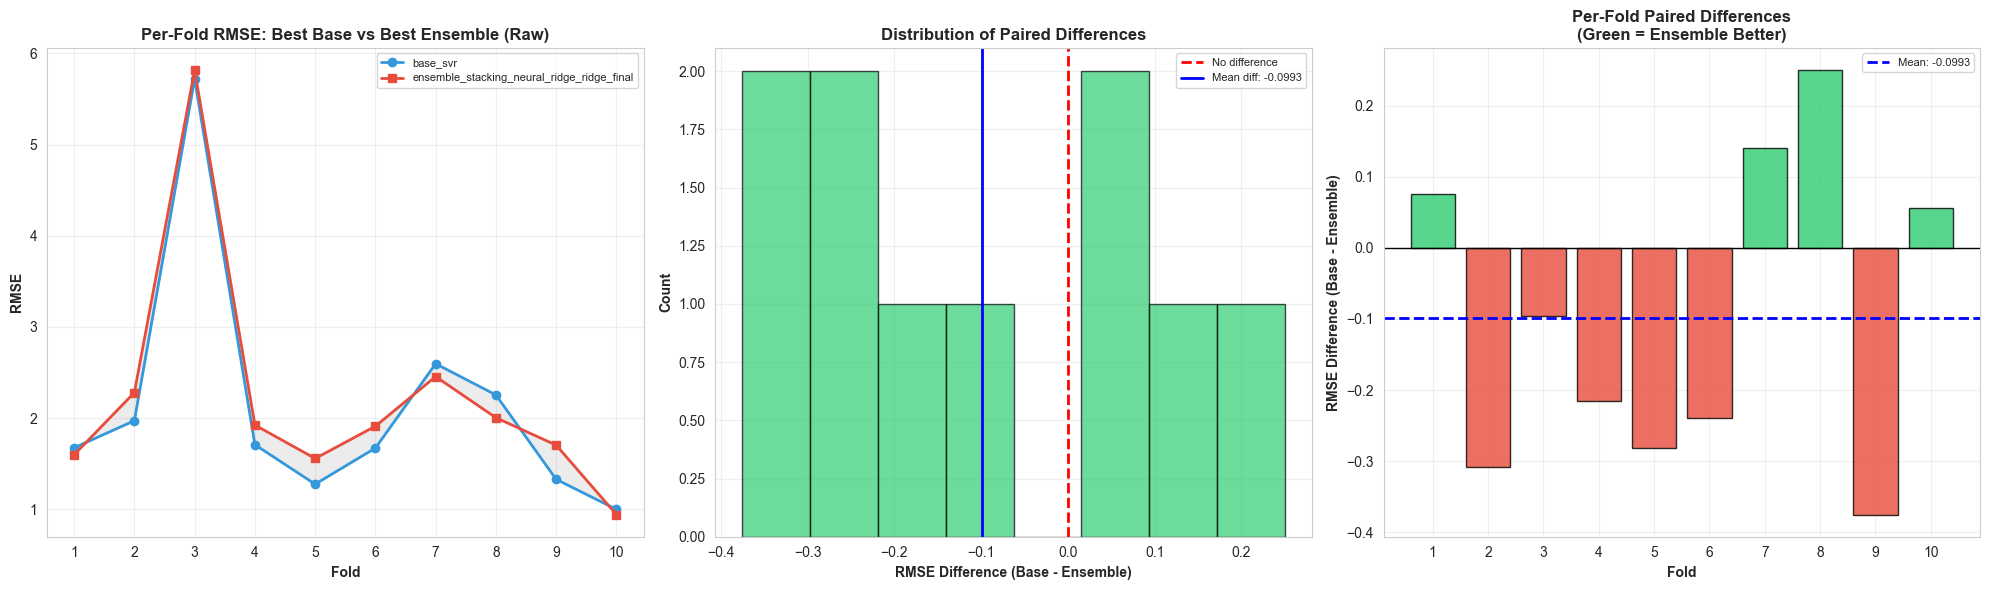


P-VALUE HEATMAPS (RAW DATA)


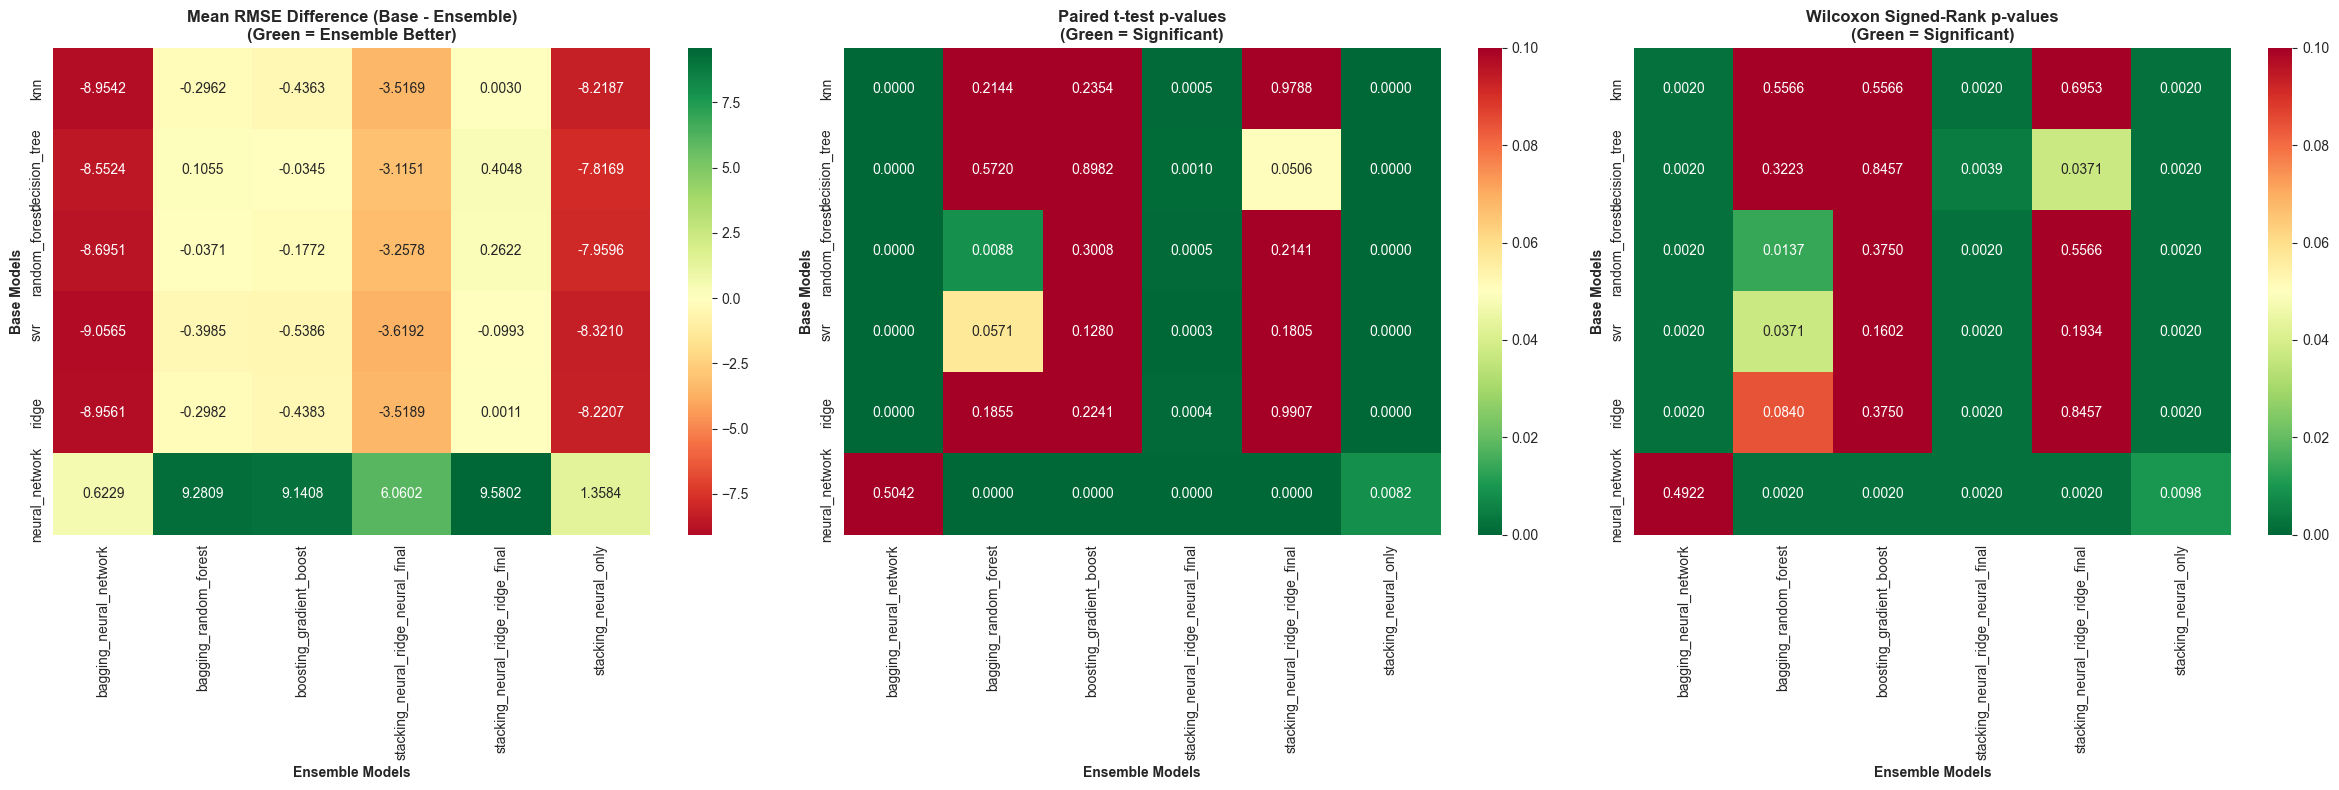

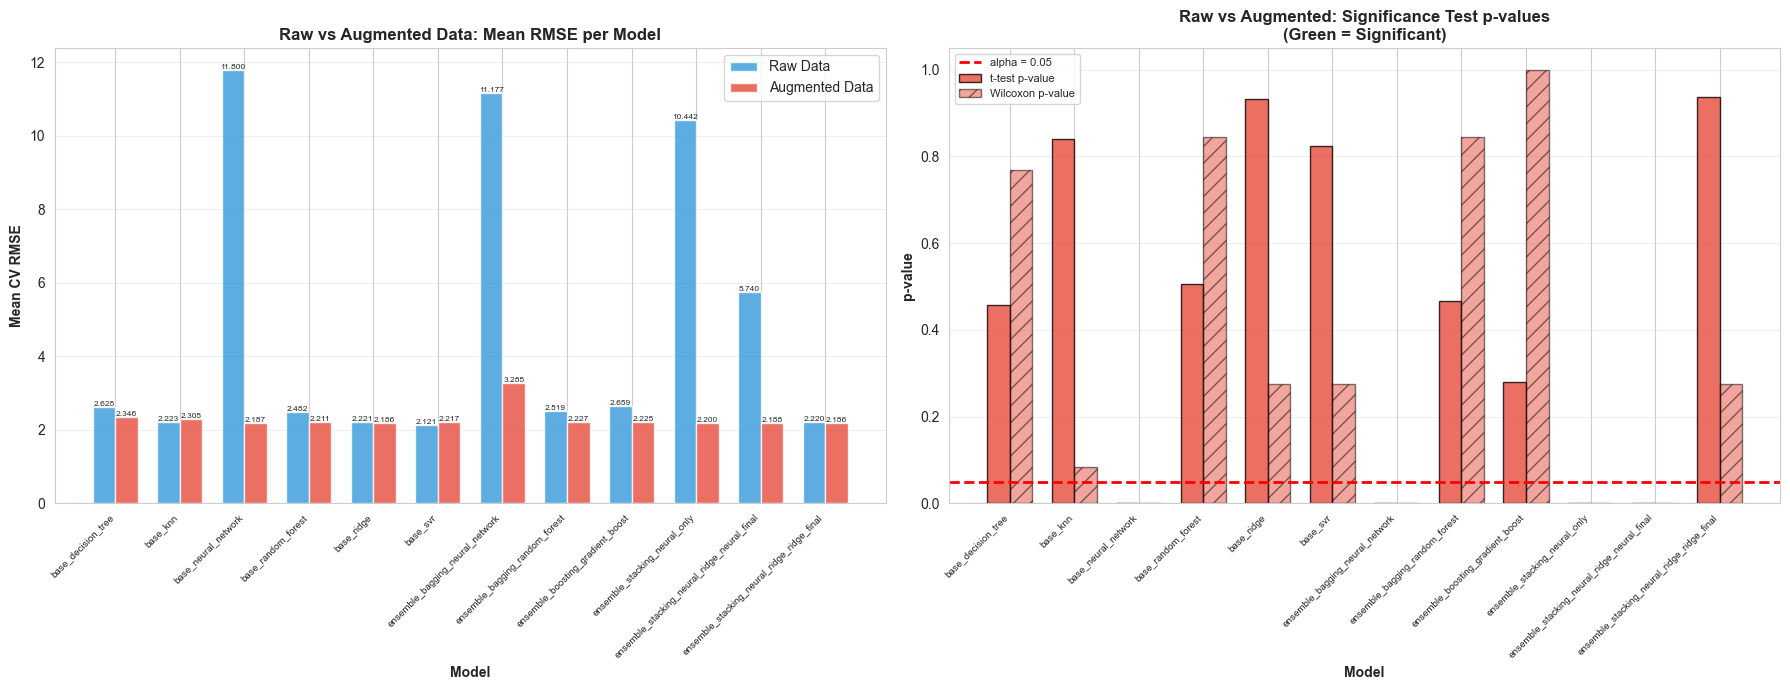


COMPREHENSIVE SIGNIFICANCE TEST FINDINGS

[FINDING 1] RAW DATA: Base vs Ensemble
------------------------------------------------------------
   Total pairwise comparisons: 36
   Ensemble has lower mean RMSE: 11/36 (30.6%)
   Statistically significant (t-test, p<0.05): 5/36
   Statistically significant (Wilcoxon, p<0.05): 6/36
   Best base: base_svr (RMSE: 2.1208)
   Best ensemble: ensemble_stacking_neural_ridge_ridge_final (RMSE: 2.2201)

[FINDING 2] AUGMENTED DATA: Base vs Ensemble
------------------------------------------------------------
   Total pairwise comparisons: 36
   Ensemble has lower mean RMSE: 17/36 (47.2%)
   Statistically significant (t-test, p<0.05): 10/36
   Statistically significant (Wilcoxon, p<0.05): 10/36

[FINDING 3] RAW vs AUGMENTED DATA (Same Architecture)
------------------------------------------------------------
   Total model comparisons: 12
   Augmented has lower mean RMSE: 10/12 (83.3%)
   Statistically significant (t-test, p<0.05): 4/12
   Statistica

In [4]:
# Cell 1: Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os
from scipy import stats
from itertools import combinations
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (16, 8)

print("All libraries imported successfully")

# Cell 2: Load Per-Fold RMSE Scores from Metadata (Raw Data Models)
# Both base and ensemble models used KFold(n_splits=10, shuffle=True, random_state=42)

raw_base_models = ['knn', 'decision_tree', 'random_forest', 'svr', 'ridge', 'neural_network']
raw_ensemble_models = [
    'bagging_neural_network', 'bagging_random_forest', 'boosting_gradient_boost',
    'stacking_neural_ridge_neural_final', 'stacking_neural_ridge_ridge_final',
    'stacking_neural_only'
]

# Load raw data base model fold scores
# Base models stored fold_val_mse in metadata, we need to convert to RMSE
# Or load from fold_val_rmse if saved directly
raw_fold_rmse = {}

print("=" * 70)
print("LOADING RAW DATA MODEL FOLD SCORES")
print("=" * 70)

# Load raw base model metadata from regression_processed_data_dataset
for name in raw_base_models:
    metadata_file = f'../regression_processed_data_dataset/{name}_metadata.json'
    if os.path.exists(metadata_file):
        with open(metadata_file, 'r') as f:
            meta = json.load(f)
        if 'fold_val_rmse' in meta:
            raw_fold_rmse[f'base_{name}'] = np.array(meta['fold_val_rmse'])
        elif 'cv_10fold_scores' in meta:
            # cv_10fold_scores are MSE values, convert to RMSE
            raw_fold_rmse[f'base_{name}'] = np.sqrt(np.array(meta['cv_10fold_scores']))
        print(f"   Loaded: base_{name} (10 folds)")
    else:
        print(f"   WARNING: {metadata_file} not found")

# Load raw ensemble model metadata from regression_processed_data_dataset
for name in raw_ensemble_models:
    metadata_file = f'../regression_processed_data_dataset/{name}_metadata.json'
    if os.path.exists(metadata_file):
        with open(metadata_file, 'r') as f:
            meta = json.load(f)
        if 'fold_val_rmse' in meta:
            raw_fold_rmse[f'ensemble_{name}'] = np.array(meta['fold_val_rmse'])
        elif 'cv_10fold_scores' in meta:
            raw_fold_rmse[f'ensemble_{name}'] = np.sqrt(np.array(meta['cv_10fold_scores']))
        print(f"   Loaded: ensemble_{name} (10 folds)")
    else:
        print(f"   WARNING: {metadata_file} not found")

print(f"\nTotal raw models loaded: {len(raw_fold_rmse)}")
for name, scores in raw_fold_rmse.items():
    print(f"   {name}: mean RMSE = {np.mean(scores):.4f} +/- {np.std(scores):.4f}")

# Cell 3: Load Per-Fold RMSE Scores from Metadata (Augmented/Dataset Models)

aug_fold_rmse = {}

print("=" * 70)
print("LOADING AUGMENTED DATA MODEL FOLD SCORES")
print("=" * 70)

# Load augmented base model metadata from regression_processed_data
for name in raw_base_models:
    metadata_file = f'../regression_processed_data/{name}_metadata.json'
    if os.path.exists(metadata_file):
        with open(metadata_file, 'r') as f:
            meta = json.load(f)
        if 'fold_val_rmse' in meta:
            aug_fold_rmse[f'base_{name}'] = np.array(meta['fold_val_rmse'])
        elif 'cv_10fold_scores' in meta:
            aug_fold_rmse[f'base_{name}'] = np.sqrt(np.array(meta['cv_10fold_scores']))
        print(f"   Loaded: base_{name} (10 folds)")
    else:
        print(f"   WARNING: {metadata_file} not found")

# Load augmented ensemble model metadata from regression_processed_data
for name in raw_ensemble_models:
    metadata_file = f'../regression_processed_data/{name}_metadata.json'
    if os.path.exists(metadata_file):
        with open(metadata_file, 'r') as f:
            meta = json.load(f)
        if 'fold_val_rmse' in meta:
            aug_fold_rmse[f'ensemble_{name}'] = np.array(meta['fold_val_rmse'])
        elif 'cv_10fold_scores' in meta:
            aug_fold_rmse[f'ensemble_{name}'] = np.sqrt(np.array(meta['cv_10fold_scores']))
        print(f"   Loaded: ensemble_{name} (10 folds)")
    else:
        print(f"   WARNING: {metadata_file} not found")

print(f"\nTotal augmented models loaded: {len(aug_fold_rmse)}")
for name, scores in aug_fold_rmse.items():
    print(f"   {name}: mean RMSE = {np.mean(scores):.4f} +/- {np.std(scores):.4f}")

# Cell 4: Define Paired Significance Test Function
def paired_significance_test(scores_a, scores_b, model_a_name, model_b_name, alpha=0.05):
    """
    Perform paired t-test and Wilcoxon signed-rank test on paired fold RMSE scores.
    Lower RMSE is better, so if model_b has lower RMSE, model_b is better.

    Returns a dict with all test results.
    """
    assert len(scores_a) == len(scores_b), "Fold counts must match"

    differences = scores_a - scores_b  # positive means A is worse (higher RMSE)
    mean_diff = np.mean(differences)
    std_diff = np.std(differences, ddof=1)

    # Paired t-test (two-sided)
    t_stat, t_pvalue = stats.ttest_rel(scores_a, scores_b)

    # Wilcoxon signed-rank test (two-sided)
    # Handle case where all differences are zero
    if np.all(differences == 0):
        w_stat, w_pvalue = 0.0, 1.0
    else:
        w_stat, w_pvalue = stats.wilcoxon(scores_a, scores_b)

    # Determine which model is better
    if mean_diff > 0:
        better_model = model_b_name
    elif mean_diff < 0:
        better_model = model_a_name
    else:
        better_model = "Tie"

    # Significance conclusion
    t_significant = t_pvalue < alpha
    w_significant = w_pvalue < alpha

    return {
        'Model_A': model_a_name,
        'Model_B': model_b_name,
        'Mean_A': np.mean(scores_a),
        'Mean_B': np.mean(scores_b),
        'Mean_Diff': mean_diff,
        'Std_Diff': std_diff,
        'Better_Model': better_model,
        # Paired t-test
        't_statistic': t_stat,
        't_pvalue': t_pvalue,
        't_significant': t_significant,
        # Wilcoxon test
        'w_statistic': w_stat,
        'w_pvalue': w_pvalue,
        'w_significant': w_significant,
        # Raw data
        'scores_a': scores_a,
        'scores_b': scores_b,
        'differences': differences
    }


def print_test_result(result, alpha=0.05):
    """Print a single paired test result in a readable format."""
    print(f"\n   {result['Model_A']}  vs  {result['Model_B']}")
    print(f"   Mean RMSE A: {result['Mean_A']:.4f}   Mean RMSE B: {result['Mean_B']:.4f}")
    print(f"   Mean Difference (A - B): {result['Mean_Diff']:.4f} +/- {result['Std_Diff']:.4f}")
    print(f"   Better Model: {result['Better_Model']}")
    print(f"   --- Paired t-test ---")
    print(f"   t-statistic: {result['t_statistic']:.4f}   p-value: {result['t_pvalue']:.6f}   "
          f"Significant (p<{alpha}): {result['t_significant']}")
    print(f"   --- Wilcoxon signed-rank test ---")
    print(f"   W-statistic: {result['w_statistic']:.4f}   p-value: {result['w_pvalue']:.6f}   "
          f"Significant (p<{alpha}): {result['w_significant']}")


print("Significance test functions defined")

# Cell 5: TEST 1 -- Best Base vs Best Ensemble (Raw Data)
print("=" * 70)
print("TEST 1: BEST BASE vs BEST ENSEMBLE (RAW DATA)")
print("=" * 70)

# Find best base and best ensemble by mean RMSE
raw_base_keys = [k for k in raw_fold_rmse.keys() if k.startswith('base_')]
raw_ensemble_keys = [k for k in raw_fold_rmse.keys() if k.startswith('ensemble_')]

best_raw_base = min(raw_base_keys, key=lambda k: np.mean(raw_fold_rmse[k]))
best_raw_ensemble = min(raw_ensemble_keys, key=lambda k: np.mean(raw_fold_rmse[k]))

print(f"\nBest Raw Base Model: {best_raw_base} (Mean RMSE: {np.mean(raw_fold_rmse[best_raw_base]):.4f})")
print(f"Best Raw Ensemble Model: {best_raw_ensemble} (Mean RMSE: {np.mean(raw_fold_rmse[best_raw_ensemble]):.4f})")

result_best = paired_significance_test(
    raw_fold_rmse[best_raw_base],
    raw_fold_rmse[best_raw_ensemble],
    best_raw_base,
    best_raw_ensemble
)
print_test_result(result_best)

# Cell 6: TEST 2 -- All Base vs All Ensemble Pairwise (Raw Data)
print("\n" + "=" * 70)
print("TEST 2: ALL BASE vs ALL ENSEMBLE PAIRWISE (RAW DATA)")
print("=" * 70)

raw_pairwise_results = []

for base_key in raw_base_keys:
    for ens_key in raw_ensemble_keys:
        result = paired_significance_test(
            raw_fold_rmse[base_key],
            raw_fold_rmse[ens_key],
            base_key,
            ens_key
        )
        raw_pairwise_results.append(result)

# Build summary table
raw_pairwise_df = pd.DataFrame([{
    'Base Model': r['Model_A'],
    'Ensemble Model': r['Model_B'],
    'Base RMSE': f"{r['Mean_A']:.4f}",
    'Ensemble RMSE': f"{r['Mean_B']:.4f}",
    'Diff (Base-Ens)': f"{r['Mean_Diff']:.4f}",
    'Better': r['Better_Model'].split('_', 1)[-1] if '_' in r['Better_Model'] else r['Better_Model'],
    't p-value': f"{r['t_pvalue']:.6f}",
    't Sig': 'Yes' if r['t_significant'] else 'No',
    'W p-value': f"{r['w_pvalue']:.6f}",
    'W Sig': 'Yes' if r['w_significant'] else 'No'
} for r in raw_pairwise_results])

print("\nRAW DATA: Base vs Ensemble Pairwise Significance Tests")
print(raw_pairwise_df.to_string(index=False))

# Count how many times ensemble is significantly better
ens_wins_t = sum(1 for r in raw_pairwise_results if r['Mean_Diff'] > 0 and r['t_significant'])
ens_wins_w = sum(1 for r in raw_pairwise_results if r['Mean_Diff'] > 0 and r['w_significant'])
total_pairs = len(raw_pairwise_results)

print(f"\nSummary: Out of {total_pairs} comparisons:")
print(f"   Ensemble significantly better (t-test): {ens_wins_t}")
print(f"   Ensemble significantly better (Wilcoxon): {ens_wins_w}")

# Cell 7: TEST 3 -- Best Base vs Best Ensemble (Augmented Data)
print("\n" + "=" * 70)
print("TEST 3: BEST BASE vs BEST ENSEMBLE (AUGMENTED DATA)")
print("=" * 70)

aug_base_keys = [k for k in aug_fold_rmse.keys() if k.startswith('base_')]
aug_ensemble_keys = [k for k in aug_fold_rmse.keys() if k.startswith('ensemble_')]

if aug_base_keys and aug_ensemble_keys:
    best_aug_base = min(aug_base_keys, key=lambda k: np.mean(aug_fold_rmse[k]))
    best_aug_ensemble = min(aug_ensemble_keys, key=lambda k: np.mean(aug_fold_rmse[k]))

    print(f"\nBest Aug Base Model: {best_aug_base} (Mean RMSE: {np.mean(aug_fold_rmse[best_aug_base]):.4f})")
    print(f"Best Aug Ensemble Model: {best_aug_ensemble} (Mean RMSE: {np.mean(aug_fold_rmse[best_aug_ensemble]):.4f})")

    result_aug_best = paired_significance_test(
        aug_fold_rmse[best_aug_base],
        aug_fold_rmse[best_aug_ensemble],
        best_aug_base,
        best_aug_ensemble
    )
    print_test_result(result_aug_best)
else:
    print("   Augmented data models not fully loaded. Skipping.")

# Cell 8: TEST 4 -- All Base vs All Ensemble Pairwise (Augmented Data)
print("\n" + "=" * 70)
print("TEST 4: ALL BASE vs ALL ENSEMBLE PAIRWISE (AUGMENTED DATA)")
print("=" * 70)

aug_pairwise_results = []

if aug_base_keys and aug_ensemble_keys:
    for base_key in aug_base_keys:
        for ens_key in aug_ensemble_keys:
            result = paired_significance_test(
                aug_fold_rmse[base_key],
                aug_fold_rmse[ens_key],
                base_key,
                ens_key
            )
            aug_pairwise_results.append(result)

    aug_pairwise_df = pd.DataFrame([{
        'Base Model': r['Model_A'],
        'Ensemble Model': r['Model_B'],
        'Base RMSE': f"{r['Mean_A']:.4f}",
        'Ensemble RMSE': f"{r['Mean_B']:.4f}",
        'Diff (Base-Ens)': f"{r['Mean_Diff']:.4f}",
        'Better': r['Better_Model'].split('_', 1)[-1] if '_' in r['Better_Model'] else r['Better_Model'],
        't p-value': f"{r['t_pvalue']:.6f}",
        't Sig': 'Yes' if r['t_significant'] else 'No',
        'W p-value': f"{r['w_pvalue']:.6f}",
        'W Sig': 'Yes' if r['w_significant'] else 'No'
    } for r in aug_pairwise_results])

    print("\nAUGMENTED DATA: Base vs Ensemble Pairwise Significance Tests")
    print(aug_pairwise_df.to_string(index=False))

    ens_wins_t = sum(1 for r in aug_pairwise_results if r['Mean_Diff'] > 0 and r['t_significant'])
    ens_wins_w = sum(1 for r in aug_pairwise_results if r['Mean_Diff'] > 0 and r['w_significant'])
    total_pairs = len(aug_pairwise_results)

    print(f"\nSummary: Out of {total_pairs} comparisons:")
    print(f"   Ensemble significantly better (t-test): {ens_wins_t}")
    print(f"   Ensemble significantly better (Wilcoxon): {ens_wins_w}")
else:
    print("   Augmented data models not fully loaded. Skipping.")

# Cell 9: TEST 5 -- Raw vs Augmented (Same Model Architecture)
# Compare whether augmentation helped each model
print("\n" + "=" * 70)
print("TEST 5: RAW vs AUGMENTED DATA (SAME MODEL ARCHITECTURE)")
print("=" * 70)
print("Does data augmentation significantly improve model performance?")

raw_vs_aug_results = []

# Find models that exist in both raw and augmented
common_models = set(raw_fold_rmse.keys()) & set(aug_fold_rmse.keys())

if common_models:
    print(f"\nCommon models found: {len(common_models)}")

    for model_name in sorted(common_models):
        # NOTE: Raw and augmented have DIFFERENT training set sizes,
        # so the folds are NOT paired in the same way.
        # We still use the paired test on the 10 fold indices as a practical comparison,
        # acknowledging this limitation.
        raw_scores = raw_fold_rmse[model_name]
        aug_scores = aug_fold_rmse[model_name]

        # Both should have 10 folds
        if len(raw_scores) == 10 and len(aug_scores) == 10:
            result = paired_significance_test(
                raw_scores,
                aug_scores,
                f'{model_name}_RAW',
                f'{model_name}_AUG'
            )
            raw_vs_aug_results.append(result)

    if raw_vs_aug_results:
        raw_vs_aug_df = pd.DataFrame([{
            'Model': r['Model_A'].replace('_RAW', ''),
            'Raw RMSE': f"{r['Mean_A']:.4f}",
            'Aug RMSE': f"{r['Mean_B']:.4f}",
            'Diff (Raw-Aug)': f"{r['Mean_Diff']:.4f}",
            'Better': 'Augmented' if r['Mean_Diff'] > 0 else 'Raw',
            't p-value': f"{r['t_pvalue']:.6f}",
            't Sig': 'Yes' if r['t_significant'] else 'No',
            'W p-value': f"{r['w_pvalue']:.6f}",
            'W Sig': 'Yes' if r['w_significant'] else 'No'
        } for r in raw_vs_aug_results])

        print("\nRaw vs Augmented Data Comparison:")
        print(raw_vs_aug_df.to_string(index=False))

        aug_better_t = sum(1 for r in raw_vs_aug_results if r['Mean_Diff'] > 0 and r['t_significant'])
        aug_better_w = sum(1 for r in raw_vs_aug_results if r['Mean_Diff'] > 0 and r['w_significant'])
        total = len(raw_vs_aug_results)

        print(f"\nSummary: Out of {total} models:")
        print(f"   Augmentation significantly better (t-test): {aug_better_t}")
        print(f"   Augmentation significantly better (Wilcoxon): {aug_better_w}")

        print("\nNOTE: Raw and augmented datasets have different sizes.")
        print("The folds are generated independently with the same random_state=42.")
        print("This comparison is practical but not a strict paired design across datasets.")
else:
    print("   No common models found between raw and augmented.")

# Cell 10: Visualization -- Paired Differences (Raw Data: Best Base vs Best Ensemble)
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Plot 1: Per-fold RMSE comparison
folds = range(1, 11)
axes[0].plot(folds, raw_fold_rmse[best_raw_base], 'o-', label=best_raw_base, color='#3498db', linewidth=2)
axes[0].plot(folds, raw_fold_rmse[best_raw_ensemble], 's-', label=best_raw_ensemble, color='#e74c3c', linewidth=2)
axes[0].fill_between(folds, raw_fold_rmse[best_raw_base], raw_fold_rmse[best_raw_ensemble],
                     alpha=0.15, color='gray')
axes[0].set_xlabel('Fold', fontweight='bold')
axes[0].set_ylabel('RMSE', fontweight='bold')
axes[0].set_title('Per-Fold RMSE: Best Base vs Best Ensemble (Raw)', fontweight='bold')
axes[0].legend(fontsize=8)
axes[0].set_xticks(range(1, 11))
axes[0].grid(alpha=0.3)

# Plot 2: Distribution of differences
differences = raw_fold_rmse[best_raw_base] - raw_fold_rmse[best_raw_ensemble]
axes[1].hist(differences, bins=8, color='#2ecc71', alpha=0.7, edgecolor='black')
axes[1].axvline(x=0, color='red', linestyle='--', linewidth=2, label='No difference')
axes[1].axvline(x=np.mean(differences), color='blue', linestyle='-', linewidth=2,
               label=f'Mean diff: {np.mean(differences):.4f}')
axes[1].set_xlabel('RMSE Difference (Base - Ensemble)', fontweight='bold')
axes[1].set_ylabel('Count', fontweight='bold')
axes[1].set_title('Distribution of Paired Differences', fontweight='bold')
axes[1].legend(fontsize=8)
axes[1].grid(alpha=0.3)

# Plot 3: Paired difference plot with confidence interval
axes[2].bar(folds, differences, color=['#2ecc71' if d > 0 else '#e74c3c' for d in differences],
           alpha=0.8, edgecolor='black')
axes[2].axhline(y=0, color='black', linewidth=1)
axes[2].axhline(y=np.mean(differences), color='blue', linestyle='--', linewidth=2,
               label=f'Mean: {np.mean(differences):.4f}')
axes[2].set_xlabel('Fold', fontweight='bold')
axes[2].set_ylabel('RMSE Difference (Base - Ensemble)', fontweight='bold')
axes[2].set_title('Per-Fold Paired Differences\n(Green = Ensemble Better)', fontweight='bold')
axes[2].set_xticks(range(1, 11))
axes[2].legend(fontsize=8)
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Cell 11: Visualization -- Heatmap of p-values (Raw Data)
print("\n" + "=" * 70)
print("P-VALUE HEATMAPS (RAW DATA)")
print("=" * 70)

# Build p-value matrices for t-test
base_names_short = [k.replace('base_', '') for k in raw_base_keys]
ens_names_short = [k.replace('ensemble_', '') for k in raw_ensemble_keys]

t_pvalue_matrix = np.zeros((len(raw_base_keys), len(raw_ensemble_keys)))
w_pvalue_matrix = np.zeros((len(raw_base_keys), len(raw_ensemble_keys)))
diff_matrix = np.zeros((len(raw_base_keys), len(raw_ensemble_keys)))

for i, base_key in enumerate(raw_base_keys):
    for j, ens_key in enumerate(raw_ensemble_keys):
        # Find the matching result
        for r in raw_pairwise_results:
            if r['Model_A'] == base_key and r['Model_B'] == ens_key:
                t_pvalue_matrix[i, j] = r['t_pvalue']
                w_pvalue_matrix[i, j] = r['w_pvalue']
                diff_matrix[i, j] = r['Mean_Diff']
                break

fig, axes = plt.subplots(1, 3, figsize=(24, 8))

# Heatmap 1: Mean RMSE Difference (Base - Ensemble)
# Positive = ensemble is better
sns.heatmap(diff_matrix, annot=True, fmt='.4f', cmap='RdYlGn',
            xticklabels=ens_names_short, yticklabels=base_names_short,
            ax=axes[0], center=0)
axes[0].set_title('Mean RMSE Difference (Base - Ensemble)\n(Green = Ensemble Better)', fontweight='bold')
axes[0].set_xlabel('Ensemble Models', fontweight='bold')
axes[0].set_ylabel('Base Models', fontweight='bold')

# Heatmap 2: Paired t-test p-values
sns.heatmap(t_pvalue_matrix, annot=True, fmt='.4f', cmap='RdYlGn_r',
            xticklabels=ens_names_short, yticklabels=base_names_short,
            ax=axes[1], vmin=0, vmax=0.1)
axes[1].set_title('Paired t-test p-values\n(Green = Significant)', fontweight='bold')
axes[1].set_xlabel('Ensemble Models', fontweight='bold')
axes[1].set_ylabel('Base Models', fontweight='bold')

# Heatmap 3: Wilcoxon p-values
sns.heatmap(w_pvalue_matrix, annot=True, fmt='.4f', cmap='RdYlGn_r',
            xticklabels=ens_names_short, yticklabels=base_names_short,
            ax=axes[2], vmin=0, vmax=0.1)
axes[2].set_title('Wilcoxon Signed-Rank p-values\n(Green = Significant)', fontweight='bold')
axes[2].set_xlabel('Ensemble Models', fontweight='bold')
axes[2].set_ylabel('Base Models', fontweight='bold')

plt.tight_layout()
plt.show()

# Cell 12: Visualization -- Raw vs Augmented Comparison
if raw_vs_aug_results:
    fig, axes = plt.subplots(1, 2, figsize=(18, 7))

    # Plot 1: Grouped bar chart -- Raw vs Augmented mean RMSE per model
    model_labels = [r['Model_A'].replace('_RAW', '') for r in raw_vs_aug_results]
    raw_means = [r['Mean_A'] for r in raw_vs_aug_results]
    aug_means = [r['Mean_B'] for r in raw_vs_aug_results]

    x = np.arange(len(model_labels))
    width = 0.35

    bars1 = axes[0].bar(x - width/2, raw_means, width, label='Raw Data', color='#3498db', alpha=0.8)
    bars2 = axes[0].bar(x + width/2, aug_means, width, label='Augmented Data', color='#e74c3c', alpha=0.8)

    for bar in bars1:
        h = bar.get_height()
        axes[0].text(bar.get_x() + bar.get_width()/2., h, f'{h:.3f}',
                    ha='center', va='bottom', fontsize=6)
    for bar in bars2:
        h = bar.get_height()
        axes[0].text(bar.get_x() + bar.get_width()/2., h, f'{h:.3f}',
                    ha='center', va='bottom', fontsize=6)

    axes[0].set_xlabel('Model', fontweight='bold')
    axes[0].set_ylabel('Mean CV RMSE', fontweight='bold')
    axes[0].set_title('Raw vs Augmented Data: Mean RMSE per Model', fontweight='bold')
    axes[0].set_xticks(x)
    axes[0].set_xticklabels(model_labels, rotation=45, ha='right', fontsize=7)
    axes[0].legend()
    axes[0].grid(axis='y', alpha=0.3)

    # Plot 2: Significance markers
    t_pvalues = [r['t_pvalue'] for r in raw_vs_aug_results]
    w_pvalues = [r['w_pvalue'] for r in raw_vs_aug_results]

    bar_colors_t = ['#2ecc71' if p < 0.05 else '#e74c3c' for p in t_pvalues]
    bar_colors_w = ['#2ecc71' if p < 0.05 else '#e74c3c' for p in w_pvalues]

    axes[1].bar(x - width/2, t_pvalues, width, label='t-test p-value',
               color=bar_colors_t, alpha=0.8, edgecolor='black')
    axes[1].bar(x + width/2, w_pvalues, width, label='Wilcoxon p-value',
               color=bar_colors_w, alpha=0.5, edgecolor='black', hatch='//')
    axes[1].axhline(y=0.05, color='red', linestyle='--', linewidth=2, label='alpha = 0.05')
    axes[1].set_xlabel('Model', fontweight='bold')
    axes[1].set_ylabel('p-value', fontweight='bold')
    axes[1].set_title('Raw vs Augmented: Significance Test p-values\n(Green = Significant)', fontweight='bold')
    axes[1].set_xticks(x)
    axes[1].set_xticklabels(model_labels, rotation=45, ha='right', fontsize=7)
    axes[1].legend(fontsize=8)
    axes[1].grid(axis='y', alpha=0.3)

    plt.tight_layout()
    plt.show()
else:
    print("No Raw vs Augmented results to plot.")

# Cell 13: Comprehensive Findings Summary
print("\n" + "=" * 90)
print("COMPREHENSIVE SIGNIFICANCE TEST FINDINGS")
print("=" * 90)

# Finding 1: Raw data -- base vs ensemble
print("\n[FINDING 1] RAW DATA: Base vs Ensemble")
print("-" * 60)
if raw_pairwise_results:
    ens_better_count = sum(1 for r in raw_pairwise_results if r['Mean_Diff'] > 0)
    ens_sig_t = sum(1 for r in raw_pairwise_results if r['Mean_Diff'] > 0 and r['t_significant'])
    ens_sig_w = sum(1 for r in raw_pairwise_results if r['Mean_Diff'] > 0 and r['w_significant'])
    total = len(raw_pairwise_results)

    print(f"   Total pairwise comparisons: {total}")
    print(f"   Ensemble has lower mean RMSE: {ens_better_count}/{total} ({100*ens_better_count/total:.1f}%)")
    print(f"   Statistically significant (t-test, p<0.05): {ens_sig_t}/{total}")
    print(f"   Statistically significant (Wilcoxon, p<0.05): {ens_sig_w}/{total}")
    print(f"   Best base: {best_raw_base} (RMSE: {np.mean(raw_fold_rmse[best_raw_base]):.4f})")
    print(f"   Best ensemble: {best_raw_ensemble} (RMSE: {np.mean(raw_fold_rmse[best_raw_ensemble]):.4f})")

# Finding 2: Augmented data -- base vs ensemble
print("\n[FINDING 2] AUGMENTED DATA: Base vs Ensemble")
print("-" * 60)
if aug_pairwise_results:
    ens_better_count = sum(1 for r in aug_pairwise_results if r['Mean_Diff'] > 0)
    ens_sig_t = sum(1 for r in aug_pairwise_results if r['Mean_Diff'] > 0 and r['t_significant'])
    ens_sig_w = sum(1 for r in aug_pairwise_results if r['Mean_Diff'] > 0 and r['w_significant'])
    total = len(aug_pairwise_results)

    print(f"   Total pairwise comparisons: {total}")
    print(f"   Ensemble has lower mean RMSE: {ens_better_count}/{total} ({100*ens_better_count/total:.1f}%)")
    print(f"   Statistically significant (t-test, p<0.05): {ens_sig_t}/{total}")
    print(f"   Statistically significant (Wilcoxon, p<0.05): {ens_sig_w}/{total}")
else:
    print("   No augmented pairwise results available.")

# Finding 3: Raw vs Augmented
print("\n[FINDING 3] RAW vs AUGMENTED DATA (Same Architecture)")
print("-" * 60)
if raw_vs_aug_results:
    aug_better = sum(1 for r in raw_vs_aug_results if r['Mean_Diff'] > 0)
    aug_sig_t = sum(1 for r in raw_vs_aug_results if r['Mean_Diff'] > 0 and r['t_significant'])
    aug_sig_w = sum(1 for r in raw_vs_aug_results if r['Mean_Diff'] > 0 and r['w_significant'])
    total = len(raw_vs_aug_results)

    print(f"   Total model comparisons: {total}")
    print(f"   Augmented has lower mean RMSE: {aug_better}/{total} ({100*aug_better/total:.1f}%)")
    print(f"   Statistically significant (t-test, p<0.05): {aug_sig_t}/{total}")
    print(f"   Statistically significant (Wilcoxon, p<0.05): {aug_sig_w}/{total}")

    # List which models improved significantly
    print("\n   Per-model breakdown:")
    for r in raw_vs_aug_results:
        model = r['Model_A'].replace('_RAW', '')
        direction = 'Augmented better' if r['Mean_Diff'] > 0 else 'Raw better'
        sig = 'SIGNIFICANT' if r['t_significant'] or r['w_significant'] else 'not significant'
        print(f"      {model}: {direction} by {abs(r['Mean_Diff']):.4f} RMSE ({sig})")
else:
    print("   No raw vs augmented results available.")

# Overall conclusion
print("\n" + "=" * 90)
print("CONCLUSIONS")
print("=" * 90)
print("""
1. PAIRED T-TEST assumes normal distribution of differences.
   With only 10 folds, normality is hard to verify. Treat with caution.

2. WILCOXON SIGNED-RANK TEST is non-parametric and more conservative.
   If both tests agree, the finding is more robust.

3. If p < 0.05 for both tests and the RMSE difference is positive (base > ensemble),
   we can conclude the ensemble model performs SIGNIFICANTLY better than the base model.

4. For Raw vs Augmented comparisons, note that the training sets differ in size.
   The fold indices are independent, so the pairing is by fold number (1-10),
   not by identical data partitions. Interpret with this caveat.

5. Effect size matters: a statistically significant but tiny RMSE difference
   may not be practically meaningful for your thesis.
""")

# Cell 14: Save All Results to JSON
os.makedirs('../significance_test_results', exist_ok=True)

# Save raw pairwise results
raw_save = []
for r in raw_pairwise_results:
    raw_save.append({
        'model_a': r['Model_A'],
        'model_b': r['Model_B'],
        'mean_rmse_a': float(r['Mean_A']),
        'mean_rmse_b': float(r['Mean_B']),
        'mean_diff': float(r['Mean_Diff']),
        'std_diff': float(r['Std_Diff']),
        'better_model': r['Better_Model'],
        't_statistic': float(r['t_statistic']),
        't_pvalue': float(r['t_pvalue']),
        't_significant': bool(r['t_significant']),
        'w_statistic': float(r['w_statistic']),
        'w_pvalue': float(r['w_pvalue']),
        'w_significant': bool(r['w_significant']),
        'fold_scores_a': [float(x) for x in r['scores_a']],
        'fold_scores_b': [float(x) for x in r['scores_b']]
    })

with open('../significance_test_results/raw_base_vs_ensemble.json', 'w') as f:
    json.dump(raw_save, f, indent=2)
print("Saved: significance_test_results/raw_base_vs_ensemble.json")

# Save augmented pairwise results
if aug_pairwise_results:
    aug_save = []
    for r in aug_pairwise_results:
        aug_save.append({
            'model_a': r['Model_A'],
            'model_b': r['Model_B'],
            'mean_rmse_a': float(r['Mean_A']),
            'mean_rmse_b': float(r['Mean_B']),
            'mean_diff': float(r['Mean_Diff']),
            'std_diff': float(r['Std_Diff']),
            'better_model': r['Better_Model'],
            't_statistic': float(r['t_statistic']),
            't_pvalue': float(r['t_pvalue']),
            't_significant': bool(r['t_significant']),
            'w_statistic': float(r['w_statistic']),
            'w_pvalue': float(r['w_pvalue']),
            'w_significant': bool(r['w_significant']),
            'fold_scores_a': [float(x) for x in r['scores_a']],
            'fold_scores_b': [float(x) for x in r['scores_b']]
        })

    with open('../significance_test_results/augmented_base_vs_ensemble.json', 'w') as f:
        json.dump(aug_save, f, indent=2)
    print("Saved: significance_test_results/augmented_base_vs_ensemble.json")

# Save raw vs augmented results
if raw_vs_aug_results:
    rva_save = []
    for r in raw_vs_aug_results:
        rva_save.append({
            'model': r['Model_A'].replace('_RAW', ''),
            'raw_mean_rmse': float(r['Mean_A']),
            'aug_mean_rmse': float(r['Mean_B']),
            'mean_diff': float(r['Mean_Diff']),
            'better': 'augmented' if r['Mean_Diff'] > 0 else 'raw',
            't_pvalue': float(r['t_pvalue']),
            't_significant': bool(r['t_significant']),
            'w_pvalue': float(r['w_pvalue']),
            'w_significant': bool(r['w_significant'])
        })

    with open('../significance_test_results/raw_vs_augmented.json', 'w') as f:
        json.dump(rva_save, f, indent=2)
    print("Saved: significance_test_results/raw_vs_augmented.json")

print("\nAll significance test results saved to: models/significance_test_results/")
print("\nSIGNIFICANCE TESTING COMPLETE")

